# A Telephone Channel Simulator

In this notebook we will develop a filter that simulates the effect of a standard telephone channel.

In [1]:
%pylab inline

import IPython
import scipy.signal as sp
from scipy.io import wavfile

Populating the interactive namespace from numpy and matplotlib


In [17]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes'
    
sys.path.append(path)

from waves.tools.dsp import * 
from waves.tools.dsp.filters import * 

Let's read in an audio file, which we will use as the test signal; the implicit sampling rate will be the internal "clock" of our simulation.

In [3]:
SF, s = wavfile.read('num9.wav')
IPython.display.Audio(s, rate=SF)

A standard telephone channel acts as a passband approx between 500Hz and 3.5KHz; we can design an optimal FIR design to simulate it. 


The scipy Remez algorithm can be used either by specifying real-world frequencies and the sampling rate, or by passing a normalized frequency band vector where the highest frequency is mapped to 0.5 (strange choice). Here we take a more reasonable approach: we use normalized frequencies so that $\pi$ corresponds to one. This is achieved by normalizing the real-world frequencies by the sampling rate $FS$ and passing a "operational" frequency of $2$ to the Remez algorithm:

In [4]:
# normalized frequencies: x = f / FS
# band start 
wa = 500.0 / (SF/2)
# band stop
wb = 3500.0 / (SF/2)
# transition band width
wd = 100. / (SF/2)

# we need a long filter to ensure the transitions are sharp
M = 600;
h = sp.remez(M, [0, wa-wd, wa, wb, wb+wd, 1], [0, 1, 0], [1, 10, 1], Hz=2, maxiter=50)

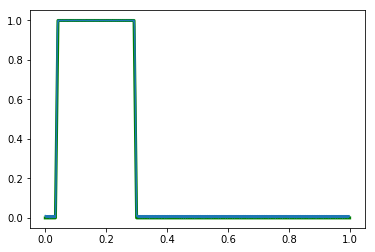

In [5]:
# plot frequency response, ideal vs actual
# plot ideal
plt.plot([0, wa-wd, wa, wb, wb+wd, 1], [0, 0, 1, 1, 0, 0], 'green', linewidth=3.0) 

# designed filter:
w, H = sp.freqz(h,worN=1024)
# freqz returns a vector of abscissae between 0 and pi
plt.plot(w/np.pi, abs(H));

Pretty good fit. Another common way to look at frequency responses is to use a log scale; this allows us to see the attenuation in the bandstop more precisely (and we can see the ripples of the minimax filter):

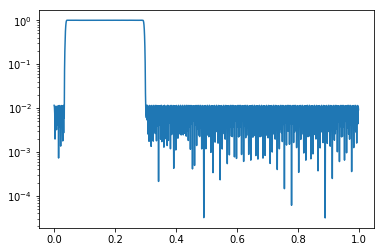

In [6]:
plt.semilogy(w/np.pi, abs(H));

OK, we can now pass the audio signal through the "telephone" channel and hear the result:

In [10]:
y = np.convolve(s, h, 'same')
IPython.display.Audio(y, rate = SF)

In [19]:
wa1 = 500.0  
wb1 = 3500.0  
wd1 = 100. 
bands = [0, wa1-wd1, wa1, wb1, wb1+wd1, SF/2]
rem = Remez(M, bands, [0, 1, 0], [1, 10, 1], Hz=SF, maxiter=50)

y1 = rem.filter(s)
IPython.display.Audio(y1, rate = SF)

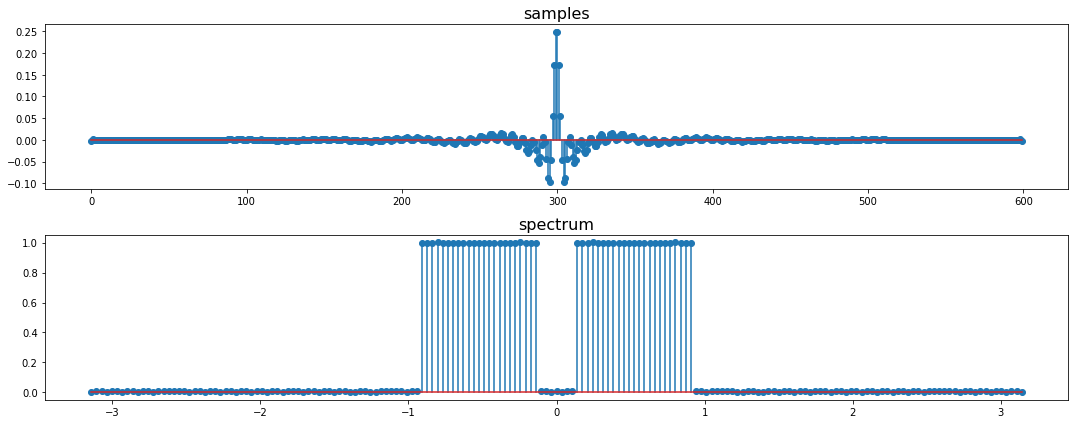

In [26]:
_ = fourier.dtft(rem.b)

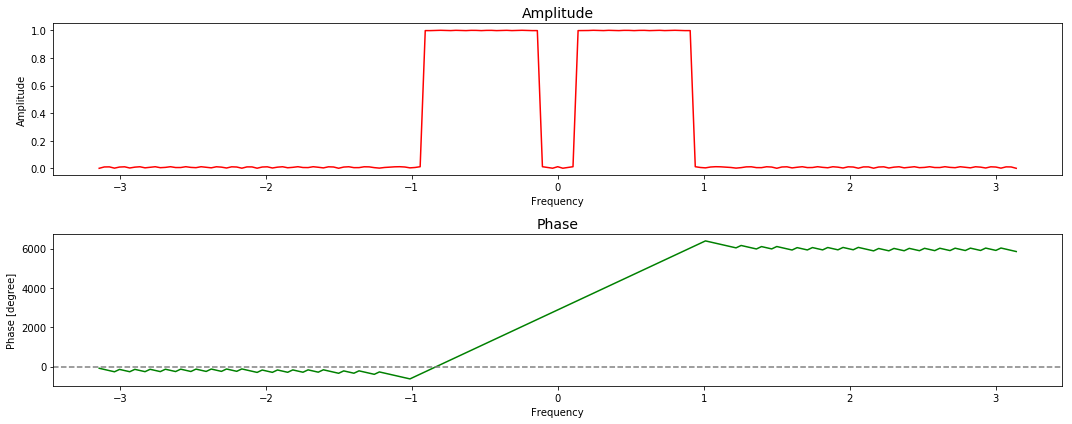

In [25]:
_ = filtering.get_H_from_polynomials([rem.b], plot = True)

We can now look at the effects of filtering in the frequency domain. Since the signal doesn't have a lot of high frequency content, the acoustic effects of the channel is primarily that of removing the low frequencies up to 500Hz. 

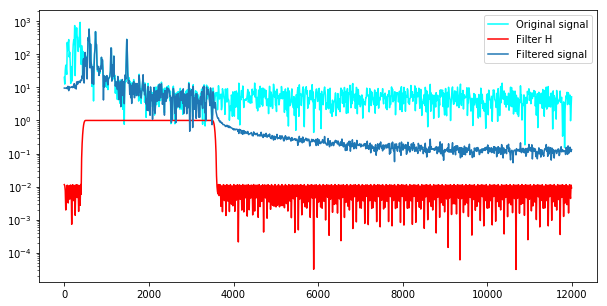

In [12]:
# check the spectrum: first the signal
# keep the same points for all plots
N = len(w)
S = np.abs(np.fft.fft(s, 2*N));
S = S[0:N];

plt.figure(figsize = (10, 5))

plt.semilogy(w/np.pi * (SF/2), S/N, 'cyan', label = 'Original signal')
plt.semilogy(w/np.pi * (SF/2), abs(H), 'red', label = 'Filter H');

Y = np.abs(np.fft.fft(y, 2*N));
Y = Y[0:N];
plt.semilogy(w/np.pi * (SF/2), Y/N, label = 'Filtered signal');
plt.legend();